In [0]:
SANDBOX_NAME = 'fesc' # Sandbox Name
DATA_PATH = "/data/sandboxes/"+SANDBOX_NAME+"/data/"

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive




# Workshop de Python

Cargamos datasets con información de admisiones a hospitales de enfermos de diabetes. El objetivo es, una vez limpiado el dataset, estudiarlo para extraer el máximo número de insights de los datos.



## Cargar librerías

In [0]:
%matplotlib inline

import re
import random
from collections import Counter

import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
sns.set(color_codes=True)

#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.cross_validation import train_test_split
#from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, make_scorer
#from sklearn.grid_search import GridSearchCV, ParameterGrid
#from sklearn.cluster import KMeans



## Lectura de datos

In [0]:
# esto NO, es lectura desde Datio, pero realizamos el wrokshop en Local
#diabetes = spark.read.csv(DATA_PATH+'diabetic_data.csv', sep=',', header=True, inferSchema=True).toPandas()
#admission_source = spark.read.csv(DATA_PATH+'admission_source_id.csv', sep=',', header=True, inferSchema=True).toPandas()
#admission_type = spark.read.csv(DATA_PATH+'admission_type_id.csv', sep=',', header=True, inferSchema=True).toPandas()
#discharge_disposition = spark.read.csv(DATA_PATH+'discharge_disposition_id.csv', sep=',', header=True, inferSchema=True).toPandas()

In [0]:
#desde local
diabetes = pd.read_csv('/content/drive/My Drive/Data/dataset_diabetes/diabetic_data.csv', sep=',')
admission_source = pd.read_csv('/content/drive/My Drive/Data/dataset_diabetes/admission_source_id.csv', sep=',')
admission_type = pd.read_csv('/content/drive/My Drive/Data/dataset_diabetes/admission_type_id.csv', sep=',')
discharge_disposition = pd.read_csv('/content/drive/My Drive/Data/dataset_diabetes/discharge_disposition_id.csv', sep=',')



### Comprobar correcta lectura de los datos

# Planteamiento: 


*   visualizar Data Frames subido
*   ver el shape
*   ver info
*   ver describe (nos hacemos una idea de las principales mestricas sobre los datos del Data Frames)





In [0]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
admission_source.head()

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)


Catalogo de ID_motivo_admision (derivacio medica, hospitalaria...)

In [0]:
admission_type.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


Ctalatologo de ID_tipo_admision (Emergencia, Urgencia, Recien nacido...)

In [0]:
discharge_disposition.head()

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term hospital
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpatient care institution


Motivo de alta y derivación (Alta Casa, derivación a centro especializado a, b......)

La base de datos principal es Diabetes. Las otras 3 son catalogos. 

In [0]:
print('Las dimensiones del Data Frame diabetes es (registros, columnas) = ', diabetes.shape, 'y el numero de elementos totales es', diabetes.size)
print('Las dimensiones del Data Frame admission_source es (registros, columnas) = ', admission_source.shape, 'y el numero de elementos totales es', admission_source.size)
print('Las dimensiones del Data Frame admission_type es (registros, columnas) = ', admission_type.shape, 'y el numero de elementos totales es', admission_type.size)
print('Las dimensiones del Data Frame discharge_disposition es (registros, columnas) = ', discharge_disposition.shape, 'y el numero de elementos totales es', discharge_disposition.size)

Las dimensiones del Data Frame diabetes es (registros, columnas) =  (101766, 50) y el numero de elementos totales es 5088300
Las dimensiones del Data Frame admission_source es (registros, columnas) =  (25, 2) y el numero de elementos totales es 50
Las dimensiones del Data Frame admission_type es (registros, columnas) =  (8, 2) y el numero de elementos totales es 16
Las dimensiones del Data Frame discharge_disposition es (registros, columnas) =  (30, 2) y el numero de elementos totales es 60


In [0]:
# almaceno las dimensiones de los DF por si se necesita mas adelante.
dim_diabetes = diabetes.shape
dim_admission_source= admission_source.shape
dim_admission_type = admission_type.shape
dim_discharge_disposition = discharge_disposition.shape

Realizamos el metodo "info" que incluye tambien la información que no daria el dtype (solo nos daria el formato de las columnas)

In [0]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [0]:
admission_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
admission_source_id    25 non-null int64
description            25 non-null object
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [0]:
admission_type.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
admission_type_id    8 non-null int64
description          8 non-null object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [0]:
discharge_disposition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
discharge_disposition_id    30 non-null int64
description                 30 non-null object
dtypes: int64(1), object(1)
memory usage: 560.0+ bytes


In [0]:
diabetes.describe(include = 'all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
admission_source.describe(include = 'all')

,admission_source_id,description
count,25.000000,25
unique,NaN,25
top,NaN,Premature Delivery
freq,NaN,1
mean,13.400000,NaN
std,7.788881,NaN
min,1.000000,NaN
25%,7.000000,NaN
50%,13.000000,NaN
75%,20.000000,NaN


In [0]:
admission_type.describe(include = 'all')

,admission_type_id,description
count,8.00000,8
unique,NaN,8
top,NaN,Emergency
freq,NaN,1
mean,4.50000,NaN
std,2.44949,NaN
min,1.00000,NaN
25%,2.75000,NaN
50%,4.50000,NaN
75%,6.25000,NaN


In [0]:
discharge_disposition.describe(include = 'all')

,discharge_disposition_id,description
count,30.000000,30
unique,NaN,30
top,NaN,Discharged/transferred to a Critical Access Hospital (CAH).
freq,NaN,1
mean,15.500000,NaN
std,8.803408,NaN
min,1.000000,NaN
25%,8.250000,NaN
50%,15.500000,NaN
75%,22.750000,NaN




### Juntar todos los datos en el mismo DataFrame

In [0]:
print(diabetes.columns)
print()
print(admission_source.columns)
print()
print(admission_type.columns)
print()
print(discharge_disposition.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Index(['admission_source_id', 'description'], dtype='object')

Index

Dado que los 3 data frasmes que hay que juntar tienen la variable description con el mimso nombre, hay que renombrala en los 3 DF que vamos a juntar con DF diabetes (DF principal)

In [0]:
admission_type     =  admission_type.rename(columns={"description":"admission_type_desc"})
admission_source   =  admission_source.rename(columns={"description":"admission_source_desc"})
discharge_disposition =  discharge_disposition.rename(columns={"description":"discharge_disposition_desc"})

miramos si se ha renombrado correctamente

In [0]:
print(admission_type.columns)
print(admission_source.columns)
print(discharge_disposition.columns)


Index(['admission_type_id', 'admission_type_desc'], dtype='object')
Index(['admission_source_id', 'admission_source_desc'], dtype='object')
Index(['discharge_disposition_id', 'discharge_disposition_desc'], dtype='object')


Los nombres se han cambiado correctamente. Podemos realizar el triple cruce

In [0]:
df1 = diabetes.merge(admission_source, how='left', on=['admission_source_id'])
df2= df1.merge(admission_type, how='left', on=['admission_type_id'])
diabetes_join = df2.merge(discharge_disposition, how='left', on=['discharge_disposition_id'])
diabetes_join.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_source_desc,admission_type_desc,discharge_disposition_desc
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home


In [0]:
#comporbamos que el numero de filas de DF Join no varia respecto a diabetes
print(diabetes_join.shape)
print(diabetes.shape)


(101766, 53)
(101766, 50)




### Estudiar las dimensiones del dataset

In [0]:
print('Las dimensiones del Data Frame diabetes es (registros, columnas) = ', dim_diabetes)  # en dim_diabetes tenemos almcenadas las dimensiones del DF original
print('Las dimensiones del Data Frame diabetes cruzado es (registros, columnas) = ', diabetes_join.shape)

Las dimensiones del Data Frame diabetes es (registros, columnas) =  (101766, 50)
Las dimensiones del Data Frame diabetes cruzado es (registros, columnas) =  (101766, 53)


El cruce se ha realizado correctamente dado que se ha mantenido el mismo numero de filas y se han añadido 3 columnas al DF Original Diabetes 

In [0]:
#almaceno las dimensiones de la base cruzada.
dim_diabetes_join = diabetes_join.shape
dim_diabetes_join

(101766, 53)

In [0]:
#mirar valores unicos de las variables
diabetes_join.nunique()

encounter_id                  101766
patient_nbr                   71518 
race                          6     
gender                        3     
age                           10    
weight                        10    
admission_type_id             8     
discharge_disposition_id      26    
admission_source_id           17    
time_in_hospital              14    
payer_code                    18    
medical_specialty             73    
num_lab_procedures            118   
num_procedures                7     
num_medications               75    
number_outpatient             39    
number_emergency              33    
number_inpatient              21    
diag_1                        717   
diag_2                        749   
diag_3                        790   
number_diagnoses              16    
max_glu_serum                 4     
A1Cresult                     4     
metformin                     4     
repaglinide                   4     
nateglinide                   4     
c

+ de 100000 registros sobre + de 70000 pacientes 
variable a predecir PNDTE 


In [0]:
for x in diabetes_join.columns:
  print (diabetes_join[x].value_counts())
  print()

96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
2674482      1
281345844    1
193616274    1
355508024    1
165973818    1
125278944    1
420873188    1
157241154    1
161161032    1
174855390    1
134950734    1
154128210    1
96993108     1
122064144    1
297770840    1
382612616    1
165134172    1
108244830    1
210578766    1
443842340    1
151469730    1
289146210    1
154590960    1
145948404    1
176328594    1
            ..
249722520    1
111830682    1
126506652    1
80193186     1
186881700    1
147162726    1
263120844    1
249665124    1
151295556    1
113303472    1
73909806     1
422050106    1
13655088     1
168523320    1
296140568    1
98784828     1
157333056    1
280536642    1
130655706    1
190162530    1
107017800    1
103828530    1
176744010    1
172279374    1
297285200    1
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, Length: 101766, dtype: int64

88785891     40
43140906     28
231

vemos las vfrecuencias d variables. hemos detectado valores raros en alguna de ellas. Luego haremos limpieza de datos.



## Data Wrangling



### Cambiar los nombres de las columnas para que cumplan buenas prácticas

Vamos a ver si los nombres de las columans tienen nombres que respectan las buenas practicas

In [0]:
list(diabetes_join.columns)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted',
 'admission_source_desc',
 'admission_type_desc',
 'discharge_disposition_desc']

vemos que hay simbolos como - y mayusculas

In [0]:
diabetes_join.columns = [x.replace(' ','_').replace('-','').lower() for x in diabetes_join.columns]
list(diabetes_join.columns)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'a1cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburidemetformin',
 'glipizidemetformin',
 'glimepiridepioglitazone',
 'metforminrosiglitazone',
 'metforminpioglitazone',
 'change',
 'diabetesmed',
 'readmitted',
 'admission_source_desc',
 'admission_type_desc',
 'discharge_disposition_desc']

Ok, hemos moldificado correctamente los nombres de las variables



### Estudiar el formato de las variables, ver cuáles se deberían modificar y modificarlas cuando se considere oportuno

In [0]:
diabetes_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 53 columns):
encounter_id                  101766 non-null int64
patient_nbr                   101766 non-null int64
race                          101766 non-null object
gender                        101766 non-null object
age                           101766 non-null object
weight                        101766 non-null object
admission_type_id             101766 non-null int64
discharge_disposition_id      101766 non-null int64
admission_source_id           101766 non-null int64
time_in_hospital              101766 non-null int64
payer_code                    101766 non-null object
medical_specialty             101766 non-null object
num_lab_procedures            101766 non-null int64
num_procedures                101766 non-null int64
num_medications               101766 non-null int64
number_outpatient             101766 non-null int64
number_emergency              101766 non-null int64

Hay variables int64 (numericas) y object (categoricas). 

*   Creamos tmb un DF con solo las numericas y las dibujamos (intentamos dientificar si hay categoricas dentro de las numericas). 
*  Creamos tmb un DF con solo las categoricas. 


In [0]:
diabetes_join_num = diabetes_join.select_dtypes(include = ['float64', 'int64'])
diabetes_join_num.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5


In [0]:
diabetes_join_cat = diabetes_join.select_dtypes(include = ['object'])
diabetes_join_cat.head()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,glipizidemetformin,glimepiridepioglitazone,metforminrosiglitazone,metforminpioglitazone,change,diabetesmed,readmitted,admission_source_desc,admission_type_desc,discharge_disposition_desc
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,?,None,...,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,None,...,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home
2,AfricanAmerican,Female,[20-30),?,?,?,648,250,V27,None,...,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home
3,Caucasian,Male,[30-40),?,?,?,8,250.43,403,None,...,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home
4,Caucasian,Male,[40-50),?,?,?,197,157,250,None,...,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home


Visualizamos el histograma de las numericas.

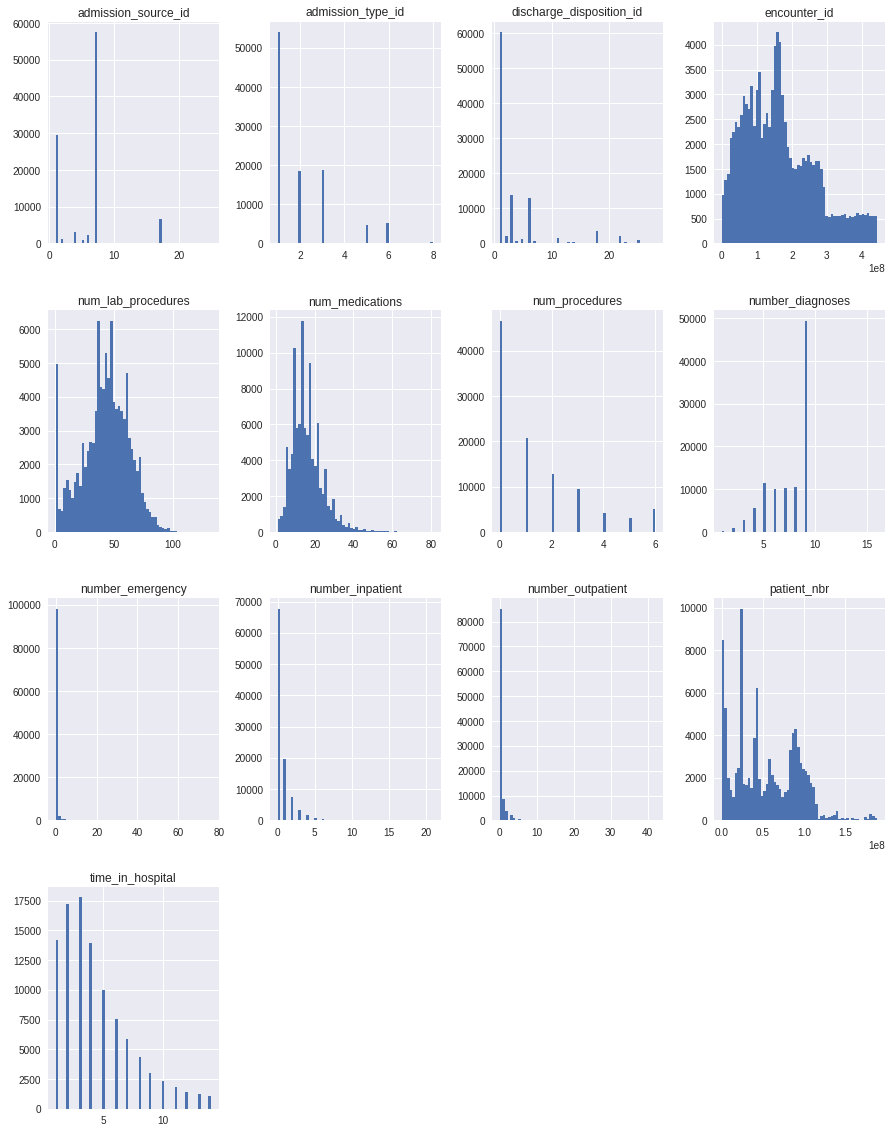

In [0]:
diabetes_join_num.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

Hemos Identificado alguna numerica que dada la frecuencia, podrian ser categoricas. Visto el nombre de las variables, parece logico categorizarlas. (seria interesante poder disponer de un dicionario de las variables para tomar criterios correctos)

In [0]:
#Creamos una lista de las columnas que vamos a modificar de Numericas a categorica, segun el analisis anterior
lista_cambio_num_a_cat =  ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']
print(lista_cambio_num_a_cat) 

['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']


In [0]:
#Recorremos la lista anterior de variables a cambiar y aplicamos FOR para convertir a OBJECT
for x in lista_cambio_num_a_cat:
  diabetes_join[x] = diabetes_join[x].astype('object')

In [0]:
#Comprobamos la correcta conversión.
diabetes_join.dtypes

encounter_id                  object
patient_nbr                   object
race                          object
gender                        object
age                           object
weight                        object
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital              int64 
payer_code                    object
medical_specialty             object
num_lab_procedures            int64 
num_procedures                int64 
num_medications               int64 
number_outpatient             int64 
number_emergency              int64 
number_inpatient              int64 
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses              int64 
max_glu_serum                 object
a1cresult                     object
metformin                     object
repaglinide                   object
nateglinide                   object
c

In [0]:
#definimos 2 DF y 2 listas con las categoricas y numéricas (habrá que actualirlos a los largo del notebook si cambiamos mas formatos)
diabetes_join_num2 = diabetes_join.select_dtypes(include = ['float64', 'int64'])
diabetes_join_cat2 = diabetes_join.select_dtypes(include = ['object'])

col_cat=list(diabetes_join_cat2.columns)
col_num=list(diabetes_join_num2.columns)

#mostramos listas de variables categoricas y numericas

print(col_cat)
print()
print(col_num)

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'a1cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburidemetformin', 'glipizidemetformin', 'glimepiridepioglitazone', 'metforminrosiglitazone', 'metforminpioglitazone', 'change', 'diabetesmed', 'readmitted', 'admission_source_desc', 'admission_type_desc', 'discharge_disposition_desc']

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


OJO Falta tratamiento de diag_1,2,3 que estan como categoricas 
Lo haremos despues del tratamiento de nulos.

---






### Estudiar si hay registros repetidos

Comparamos las dimensiones del DF original y del DF sin repetidos que creamos. 
La siguiente instruccion dice si hay repetidos o no, y si hay repetidos, te dice cuantos.

In [0]:
#numeros de filas en diabetes original
df_orig_filas = dim_diabetes_join[0]

#DF sin repetidos y numero de filas en diabetes sin repetidos
diabetes_join_sd = diabetes_join.drop_duplicates()
df_sire_filas = diabetes_join_sd.shape[0]
#df_sire_filas = 90000


#resultado: 
if df_orig_filas==df_sire_filas:
  print ('No hay duplicados')
else:
  num_dup = df_orig_filas-df_sire_filas
  print('CUIDADO hay', num_dup, 'duplicados')


No hay duplicados




### Estudiar si hay variables que siempre o prácticamente siempre toman el mismo valor: tomar siempre el mismo valor no aporta información al modelo

Hemos visto en el apartado de formato de variables que tenemos alguna categorica con fecuencias muy concentradas. Analizamos en detalle: 

In [0]:
# creo una funcion que mide si hay variables con valores con frecuencia por encima de un cierto nivel de tolerancia (a definir segun necesidad, es input de la funcion que definimos) y usaremos
def concentracion(df,var, concentracion):
    aa=df.groupby([var]).size()/df.shape[0]  #saca la frecuencia (filas de una caracteristicva / total de filas de la variable que es el total de los registros
    return aa.max() > concentracion  # devuelve True o False comparando el maximo de las frecs vs el umbral definido (si es menor: False, si es mayor True). 

In [0]:
#compruebo que la instruccion de la funcion definida saca las frecuencias: 
diabetes_join_cat2.groupby(['race']).size()/diabetes_join_cat2.shape[0]

race
?                  0.022336
AfricanAmerican    0.188766
Asian              0.006299
Caucasian          0.747784
Hispanic           0.020017
Other              0.014799
dtype: float64

In [0]:
#compruebo que la funcion funcione con una variable, para definir el analisis para todas las variables categoricas
concentracion(diabetes_join,'race',0.9) # esto sirve para variable a variable

False

La funcion para detectar concentración de valores en una variable, funciona. Iteramos. 
Ademas queremos permitir que el usuario defina el nivel de concentracion que quiere y sacar la lista de variables con concentracion mayor a la definida por el usuario
```



In [0]:
# creamos una SERIE con las categoricas para poder hacer las frecuencias de una (en el FOR siguiente)  (hasta ahora solo teniamos creada la lista)

col_cat_serie=pd.Series(col_cat).astype(str)
print(col_cat_serie)

0     encounter_id              
1     patient_nbr               
2     race                      
3     gender                    
4     age                       
5     weight                    
6     admission_type_id         
7     discharge_disposition_id  
8     admission_source_id       
9     payer_code                
10    medical_specialty         
11    diag_1                    
12    diag_2                    
13    diag_3                    
14    max_glu_serum             
15    a1cresult                 
16    metformin                 
17    repaglinide               
18    nateglinide               
19    chlorpropamide            
20    glimepiride               
21    acetohexamide             
22    glipizide                 
23    glyburide                 
24    tolbutamide               
25    pioglitazone              
26    rosiglitazone             
27    acarbose                  
28    miglitol                  
29    troglitazone              
30    tola

In [0]:
# metemos en una lista todas aquellas variables cuya concentracion en frecuancia supera el nivel de tolerancia

print ("cual el el nivel de concentración tolerado?")
alfa = input()
alfa = float(alfa)
# metemos en una lista todas aquellas variables cuya concentracion en frecuancia supera el umbral 
lista_var_concentradas = [x for x in col_cat_serie if concentracion(diabetes_join_cat2,x,alfa)==True]
print ("las variables que contienen valores concentrados al nivel definido son:", lista_var_concentradas)


cual el el nivel de concentración tolerado?
0.9
las variables que contienen valores concentrados al nivel definido son: ['weight', 'max_glu_serum', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburidemetformin', 'glipizidemetformin', 'glimepiridepioglitazone', 'metforminrosiglitazone', 'metforminpioglitazone']


Tenemos creada la lista con las variables concentradas que no entraran en el modelo



### Estudiar los nulos en el dataset

In [0]:
diabetes_join.isnull().sum()

encounter_id                  0
patient_nbr                   0
race                          0
gender                        0
age                           0
weight                        0
admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
payer_code                    0
medical_specialty             0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
diag_1                        0
diag_2                        0
diag_3                        0
number_diagnoses              0
max_glu_serum                 0
a1cresult                     0
metformin                     0
repaglinide                   0
nateglinide                   0
chlorpropamide                0
glimepiride                   0
acetohexamide                 0
glipizide                     0
glyburid

Parece que no haya hulos, pero antes en en analisis de las categoricas, hemos visto que habian datos raros: 

con la instruccion siguiente detectamos los valores raros en las variables. 

race weight payer_code medical_specialty  --> ?

gender --> Unknown/Invalid 

en diag_1                         vemos numeros y codigos y dispersion de valores

max_glu_serum y a1cresult y 
admission_source_desc
admission_type_desc
discharge_disposition_desc

en las cuatro anteriores tenemos ---> None

In [0]:
for x in diabetes_join.columns:
  print (diabetes_join[x].value_counts())
  print()

In [0]:
#modificamos None, ?, Unknown/Invalid a vacio. 

diabetes_join_1 = diabetes_join.replace({"max_glu_serum":{"None": None}}).replace({"a1cresult":{"None": None}}).replace({"admission_source_desc":{"None": None}}).replace({"admission_type_desc":{"None": None}}).replace({"discharge_disposition_desc":{"None": None}})
diabetes_join_2 = diabetes_join_1.replace({"race":{'?': None}}).replace({"weight":{"?": None}}).replace({"payer_code":{"?": None}}).replace({"medical_specialty":{"?": None}})
diabetes_join_3 = diabetes_join_2.replace({"gender":{"Unknown/Invalid": None}})



In [0]:
#Comprobamos que ahora tenemos los nulos correctamente informados
diabetes_join_3.isnull().sum()

encounter_id                  0    
patient_nbr                   0    
race                          2273 
gender                        3    
age                           0    
weight                        98569
admission_type_id             0    
discharge_disposition_id      0    
admission_source_id           0    
time_in_hospital              0    
payer_code                    40256
medical_specialty             49949
num_lab_procedures            0    
num_procedures                0    
num_medications               0    
number_outpatient             0    
number_emergency              0    
number_inpatient              0    
diag_1                        0    
diag_2                        0    
diag_3                        0    
number_diagnoses              0    
max_glu_serum                 96420
a1cresult                     84748
metformin                     0    
repaglinide                   0    
nateglinide                   0    
chlorpropamide              

Tenemos que arreglar las variables DIAG. 
La diag_1 contiene valores raros.
Hay que cambiar formato Diag 1,2 3 

In [0]:
#Aplicamos funcion lambda para convertir los diags a nulo cuando no sea numerico y transformamos a float

diabetes_join_3['diag_1'] = diabetes_join_3['diag_1'].apply(lambda x: x if x.isnumeric() else np.nan)
diabetes_join_3['diag_2'] = diabetes_join_3['diag_2'].apply(lambda x: x if x.isnumeric() else np.nan)
diabetes_join_3['diag_3'] = diabetes_join_3['diag_3'].apply(lambda x: x if x.isnumeric() else np.nan)

diabetes_join_3['diag_1'] = diabetes_join_3['diag_1'].astype('float64')
diabetes_join_3['diag_2'] = diabetes_join_3['diag_2'].astype('float64')
diabetes_join_3['diag_3'] = diabetes_join_3['diag_3'].astype('float64')

In [0]:
# Comprobamos nulos y de types de las variables diag1,2,3 

print(diabetes_join_3.isnull().sum())
print("----------------------------")
print()
print("----------------------------")
print(diabetes_join_3.dtypes)

In [0]:
#creamos variable numérica de age aplicando lambda nos quedamos con la edad minima del intervalo (0-10 -->0; 10-20 --> 10)

diabetes_join_3['age_num']=diabetes_join_3['age'].apply(lambda x: int(x[1])*10)
diabetes_join_3['age_num'].unique()

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [0]:
#despues de acabar de modificar formatos y contenidos de variables, ACTUALIZAMOS los 2 DF y las 2 listas con las categoricas y numéricas FINALES
diabetes_join_num3 = diabetes_join_3.select_dtypes(include = ['float64', 'int64'])
diabetes_join_cat3 = diabetes_join_3.select_dtypes(include = ['object'])

col_cat=list(diabetes_join_cat3.columns)
col_num=list(diabetes_join_num3.columns)

#mostramos listas de variables categoricas y numericas

print(col_cat)
print()
print(col_num)

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'max_glu_serum', 'a1cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburidemetformin', 'glipizidemetformin', 'glimepiridepioglitazone', 'metforminrosiglitazone', 'metforminpioglitazone', 'change', 'diabetesmed', 'readmitted', 'admission_source_desc', 'admission_type_desc', 'discharge_disposition_desc']

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'age_num']




### Estudiar los outliers

In [0]:
#Variable dependiente 
diabetes_join['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

Para estudiar los outliers, nos centramos en las numericas. 
Antes miramos las variables por si solas, (hist + box plot)
Luego miramos las variables relacionadas con la dependiente (dispersion) 

In [0]:
for x in col_num:
    plt.subplot(1, 2, 1)
    diabetes_join_3[x].plot.hist()
    plt.title(x)
    plt.subplot(1, 2, 2)
    diabetes_join_3[x].plot.box()
    plt.title(x)
    plt.show()
   

Por los graficos parece que no hay Outliers. 

ATENCIÓN A LAS VARIABLES: Number_outpacient y Number_emergency


Realizamos el test de Tukey

In [0]:
def tukey_outliers(df,column,extreme=False):
    q1, q3 = np.percentile(df[column],[25,75])
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[~((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))]

In [0]:
#realizamos el tes de Tukey para todas las numericas y comparamos las filas totales. Donde haya menos filas, Tukey dice que hay outliers. 
#Nosotros ya veremos como lo vemos..

for x in col_num:
  df_out=tukey_outliers(diabetes_join_3,x,extreme=True)
  print(x,df_out.shape)

print("")
print ("filas totales", diabetes_join_3.shape)

time_in_hospital (101766, 54)
num_lab_procedures (101766, 54)
num_procedures (101766, 54)
num_medications (101336, 54)
number_outpatient (85027, 54)
number_emergency (90383, 54)
number_inpatient (99750, 54)
diag_1 (101766, 54)
diag_2 (101766, 54)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


diag_3 (101766, 54)
number_diagnoses (101766, 54)
age_num (101766, 54)

filas totales (101766, 54)


Conclusiones:
-> todas las variables number_   parece que pueden tener outliers.

Las almaceno en una lista de variables con potenciales outliers para consulta


In [0]:
var_outliers = ['number_outpatient', 'number_emergency', 'number_inpatient','num_medications']
var_outliers

['number_outpatient',
 'number_emergency',
 'number_inpatient',
 'num_medications']



### Crear variables dummy en caso que sea conveniente

Dado que hay muchas variables concentradas que NO vamos a usar, y que no hay mucha informacion, 
Podemos crear varias variables dummy.
Creamos por ahora Dummy de Razas


In [0]:
# dummies: creo solo la varible Dummy para RAZA. race  (par sexo practicamente ya es como dummy)
var_dummies = ['race']
for x in var_dummies:
    diabetes_join_4=pd.concat([diabetes_join_3,pd.get_dummies(diabetes_join_3[x], prefix = 'dummy')],axis=1)
    #churn_tr=pd.concat([churn_tr,pd.get_dummies(churn_tr["Area Code encoder"],prefix="Area")],axis=0)
diabetes_join_4.head()



### Estudiar que todas las variables ahora sí tengan el formato y contenido adecuado. si todavía no, arreglarlas.

EN principio, todo ok, 
Falta redefinir la variable dependiente y pasarla a numerica para luego la modelizacion (que no hacemos)...

In [0]:

#Variable numerica de readmitted 

diabetes_join_4['readmitted_int']=diabetes_join_4['readmitted'].apply(lambda x:x.replace('NO','0').replace('>30','1').replace('<30','2'))
diabetes_join_4['readmitted_int']=diabetes_join_4['readmitted_int'].astype('int64')
diabetes_join_4.dtypes

In [0]:
diabetes_join_4['readmitted_int'].value_counts()

0    54864
1    35545
2    11357
Name: readmitted_int, dtype: int64



### Antes de estudiar el comportamiento de las variables, veremos si hay alguna variable derivada a crear

No creamos mas variables por ahora.

In [0]:
#despues de acabar de modificar formatos y contenidos de variables, ACTUALIZAMOS los 2 DF y las 2 listas con las categoricas y numéricas FINALES
diabetes_join_num4 = diabetes_join_4.select_dtypes(include = ['float64', 'int64'])
diabetes_join_cat4 = diabetes_join_4.select_dtypes(include = ['object'])

col_cat=list(diabetes_join_cat4.columns)
col_num=list(diabetes_join_num4.columns)



# Exploratory Data Analysis



### Crear la matriz de correlación

In [0]:
diabetes_join_num4.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,age_num,readmitted_int
time_in_hospital,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,-0.097782,0.078794,0.101346,0.220186,0.107515,0.057718
num_lab_procedures,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,-0.077197,0.019358,0.043622,0.152773,0.020770,0.037976
num_procedures,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,-0.042370,0.050959,0.048864,0.073734,-0.030104,-0.038235
num_medications,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,-0.023809,0.076373,0.083673,0.261526,0.041847,0.051772
number_outpatient,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,-0.001485,0.021834,0.028632,0.094152,0.023724,0.068552
number_emergency,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.009830,0.001397,0.007321,0.055539,-0.087291,0.103024
number_inpatient,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,-0.002602,0.012637,0.028174,0.104710,-0.042861,0.234283
diag_1,-0.097782,-0.077197,-0.042370,-0.023809,-0.001485,0.009830,-0.002602,1.000000,0.040781,0.017113,-0.032364,-0.058425,-0.006038
diag_2,0.078794,0.019358,0.050959,0.076373,0.021834,0.001397,0.012637,0.040781,1.000000,0.092254,0.143886,0.026909,0.012688
diag_3,0.101346,0.043622,0.048864,0.083673,0.028632,0.007321,0.028174,0.017113,0.092254,1.000000,0.181684,0.023738,0.036331




### Pintar la matriz de correlación

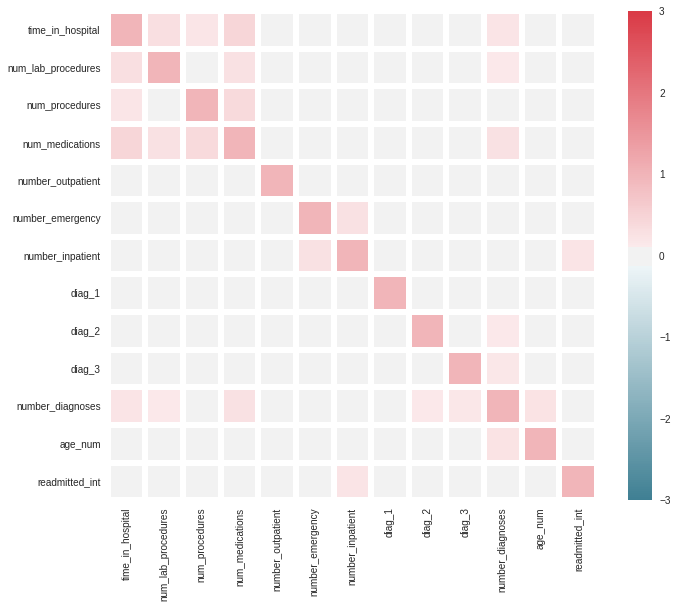

In [0]:
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(diabetes_join_num4.corr(),cmap=cmap, vmax = 3, center = 0, square = True, linewidths = 5)



### Determinar qué par de variables están correlacionadas

In [0]:
#PASO 1: 
# analisis de correlaciones versus variable dependiete: 

print ("Que nivel de correlacion quieres estudiar?")
beta = input()
beta = float(beta)
df_numerical_corr = diabetes_join_num4.corr()['readmitted_int']
df_numerical_most_corr = df_numerical_corr[abs(df_numerical_corr) > beta].sort_values(ascending=False)
df_numerical_most_corr

Que nivel de correlacion quieres estudiar?
0.4


readmitted_int    1.0
Name: readmitted_int, dtype: float64

In [0]:
#PASO 1: 
# analisis de correlaciones de todas las combinaciones de variables: 

print ("Que nivel de correlacion quieres estudiar?")
beta = input()
beta = float(beta)
for x in col_num:
  df_numerical_corr = diabetes_join_num4.corr()[x]
  df_numerical_most_corr = df_numerical_corr[abs(df_numerical_corr) > beta].sort_values(ascending=False)
  print(df_numerical_most_corr)
  print('--------------------')
  print()
  print('--------------------')
  

Que nivel de correlacion quieres estudiar?
0.4
time_in_hospital    1.000000
num_medications     0.466135
Name: time_in_hospital, dtype: float64
--------------------

--------------------
num_lab_procedures    1.0
Name: num_lab_procedures, dtype: float64
--------------------

--------------------
num_procedures    1.0
Name: num_procedures, dtype: float64
--------------------

--------------------
num_medications     1.000000
time_in_hospital    0.466135
Name: num_medications, dtype: float64
--------------------

--------------------
number_outpatient    1.0
Name: number_outpatient, dtype: float64
--------------------

--------------------
number_emergency    1.0
Name: number_emergency, dtype: float64
--------------------

--------------------
number_inpatient    1.0
Name: number_inpatient, dtype: float64
--------------------

--------------------
diag_1    1.0
Name: diag_1, dtype: float64
--------------------

--------------------
diag_2    1.0
Name: diag_2, dtype: float64
-------------

In [0]:

#intento de grafico Scatter
for idx in diabetes_join_num4.index:
    diabetes_join_num4.plot(kind='scatter',
          x=idx,
          y='readmitted_int')